# Medical Insurance Charges Prediction — End-to-End ML Project

## Introduction
This project aims to predict the medical insurance charges for customers based on demographic and health data.  
We'll explore the data, preprocess it, build predictive models, and evaluate their performance — mimicking a real-world data science project.


## Business Problem
Accurate estimation of insurance charges helps insurance companies optimize premiums and assess risk profiles efficiently.
Our goal is to predict `charges` using features like `age`, `bmi`, `smoker`, and `region`.


## Data Description
This dataset contains the following columns:
- `age`: Age of primary beneficiary
- `sex`: Gender
- `bmi`: Body Mass Index
- `children`: Number of children
- `smoker`: Smoking status
- `region`: Residential region
- `charges`: Medical insurance charges (target)


In [2]:
# Load the Data
# Import required libraries (pandas, numpy, matplotlib, seaborn).
# Load the CSV file into a DataFrame.
# Display the first 5 rows.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

### Data Inspection
First, let's look at the data shape and types to understand its structure.

In [4]:

df = pd.read_csv('medical-charges.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# Inspect Shape & Columns
print(df.shape)
print(df.columns)

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [7]:
# Check Data Types & Missing Values

# df.info()
df.isnull().sum()

# This tells you if you need data type conversions or imputation.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Statistical Summary

In [9]:
# Get summary statistics for numerical features (.describe()).
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# Get summary statistics for categorical features (include='object').
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [11]:
df['sex'].value_counts().reset_index()

,sex,count
0,male,676
1,female,662


In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Univariate Analysis
Here we visualize the distribution of numeric variables like `age`, `bmi`, and `charges`.


In [13]:
# Why?
# This helps you understand feature distributions, ranges, and potential outliers.

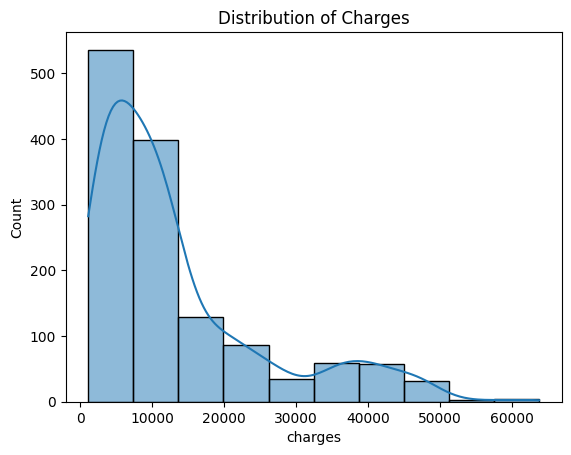

In [14]:
# Plot the distribution of target variable (charges) with a histogram or boxplot.
sns.histplot(df['charges'], kde=True, bins=10)
plt.title('Distribution of Charges')
plt.show()

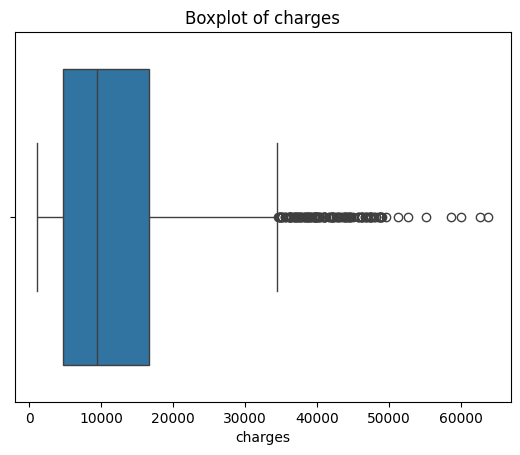

In [15]:
sns.boxplot(x=df['charges'])
plt.title('Boxplot of charges')
plt.show()

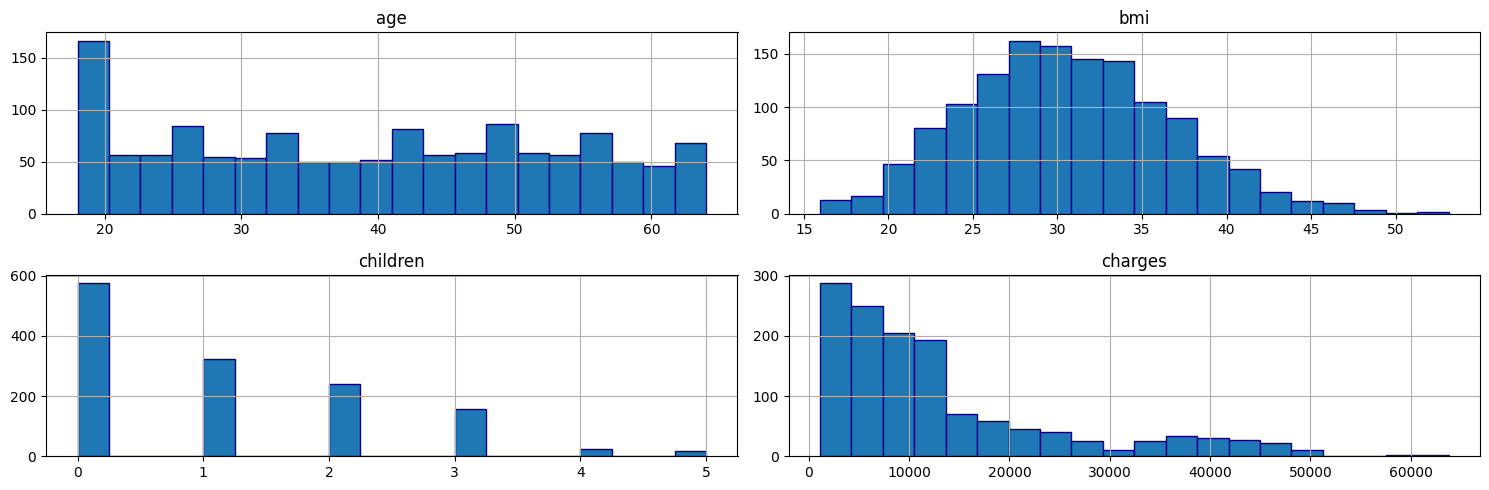

In [16]:
df.hist(bins=20, figsize=(15,5), edgecolor='darkblue')
plt.tight_layout()
plt.show()


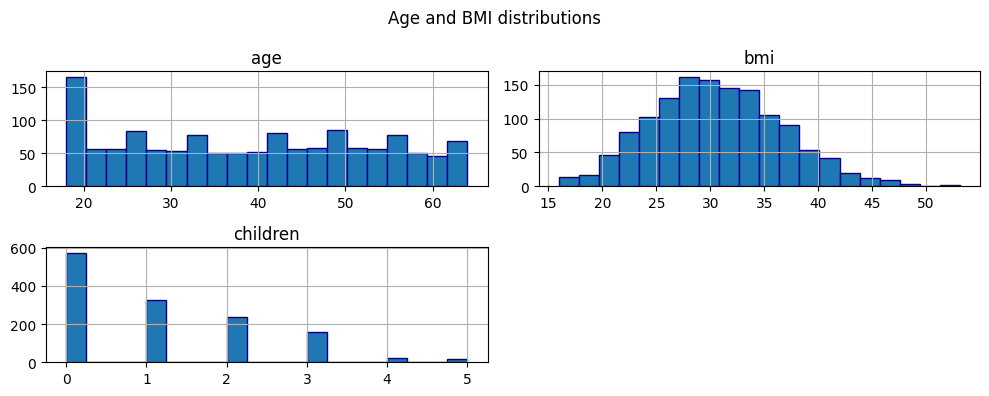

In [17]:
# Plot other continuous variables (age, bmi):
df[['age','bmi', 'children']].hist(bins=20, figsize=(10,4), edgecolor='darkblue')
plt.suptitle('Age and BMI distributions')
plt.tight_layout()
plt.show()

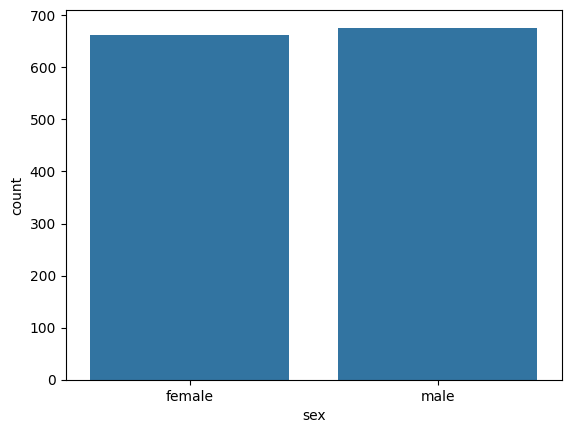

In [18]:
sns.countplot(x='sex', data=df)
plt
plt.show()

In [19]:
sex_count = df['sex'].value_counts().reset_index()
sex_count

,sex,count
0,male,676
1,female,662


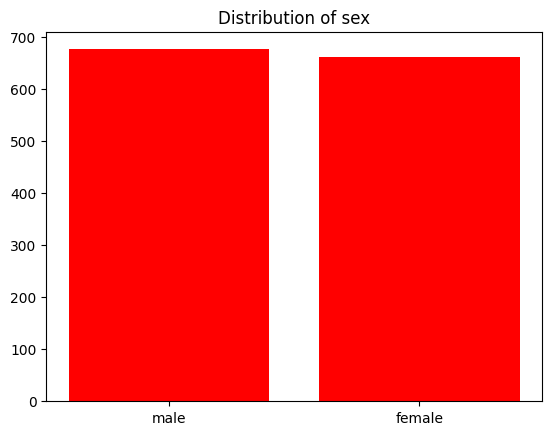

In [20]:
plt.bar(sex_count['sex'], sex_count['count'], color='red')
plt.title('Distribution of sex')
plt.show()

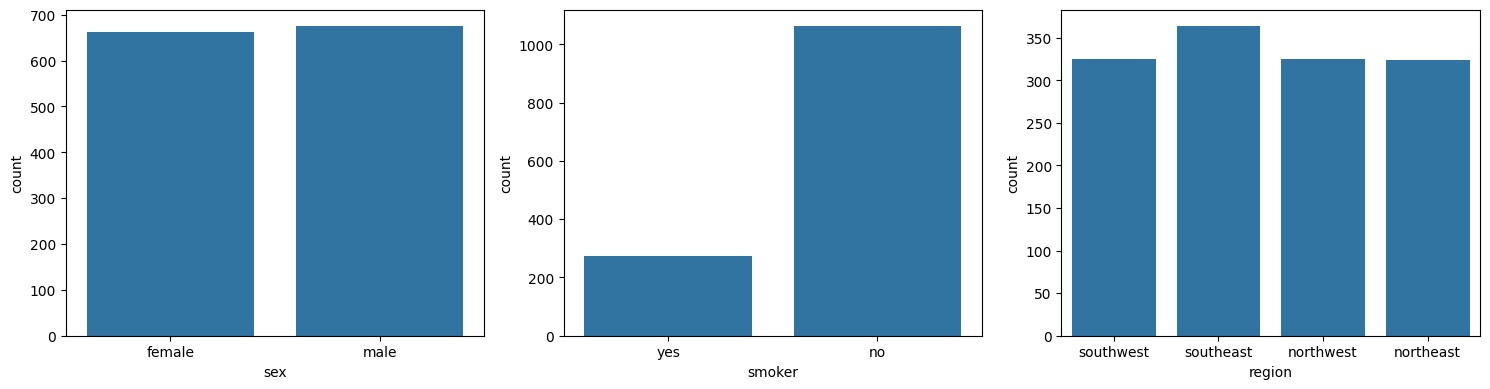

In [21]:
# Categorical Features Exploration
# Why?
# Gives insight into class balance and category distributions.
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.countplot(x='sex', data=df, ax=axes[0])
sns.countplot(x='smoker', data=df, ax=axes[1])
sns.countplot(x='region', data=df, ax=axes[2])
plt.tight_layout()
plt.show()

### Insights:
- `charges` is highly skewed with extreme values for smokers.
- `age` and `bmi` appear roughly normally distributed.

### Bivariate Analysis
#### Charges vs Smoker


In [22]:
# Bivariate Analysis
# See how target (charges) varies by categories (smoker, sex, region)

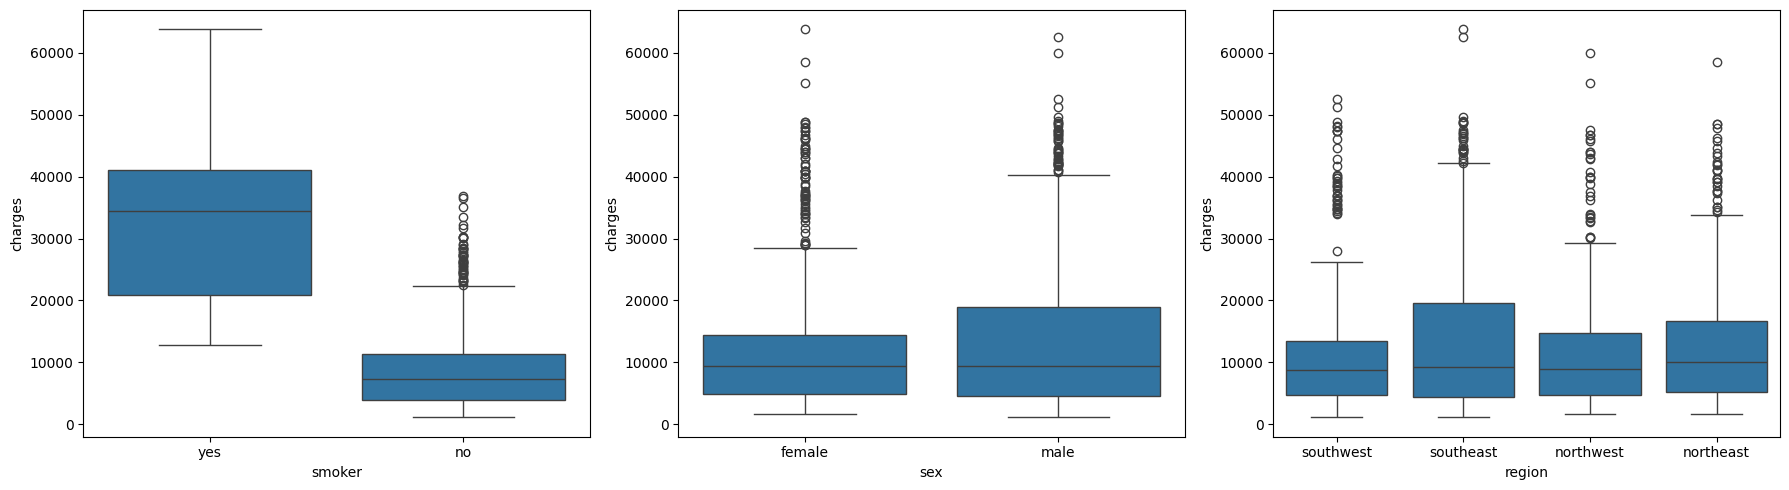

In [23]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0])
sns.boxplot(x='sex', y='charges', data=df, ax=axes[1])
sns.boxplot(x='region', y='charges', data=df, ax=axes[2])
plt.tight_layout()
plt.show()

#### Insight:
Smokers pay significantly higher charges compared to non-smokers.


In [24]:
# corr

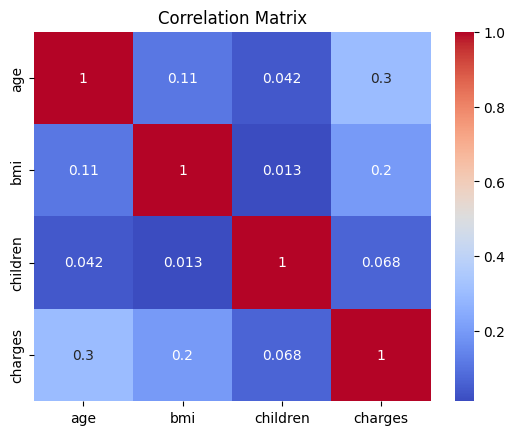

In [25]:
# Correlation heatmap for numeric variables:
# Identify relationships that might help with feature selection or engineering.
corr = df.corr(numeric_only=True) 
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing & Cleaning

In [26]:
# Check Missing or Duplicates
df.isnull().sum() #check for missing data
df.duplicated().sum() # Duplicate rows

#  Intervention:
# If missing → impute (SimpleImputer)
# If duplicate → drop (df.drop_duplicates())
# (In this dataset, there are usually no missing or duplicate



np.int64(1)

In [27]:
print(df['sex'].unique())
print(df['smoker'].unique())

['female' 'male']
['yes' 'no']


In [28]:
df['sex'] = df['sex'].str.strip().str.lower()
df['smoker'] = df['smoker'].str.strip().str.lower()

In [29]:
# Convert Categorical Features to Numeric
# Columns like sex, smoker, region need to be encoded.

# Binary encoding
# df['sex'] = df['sex'].map({'male': 1, 'female':0})
# df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})



C:\Users\Ezekiel Oluwasanjo\AppData\Local\Temp\ipykernel_18800\1432891825.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
C:\Users\Ezekiel Oluwasanjo\AppData\Local\Temp\ipykernel_18800\1432891825.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})


In [30]:
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [31]:
# One-hot encode region
df = pd.get_dummies(df, columns=['region'], drop_first=True)


In [32]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [33]:
# We can log transform charges to reduce the Outliers in charges
df['charges'] = np.log1p(df['charges'])  # log(1 + charges)

In [34]:
df['charges']

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1338, dtype: float64

In [35]:
# Scale Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['age','bmi','children']] = scaler.fit_transform(df[['age','bmi','children']])


In [36]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [37]:
new_scaler = StandardScaler()
scaled_df = new_scaler.fit_transform(df)


In [52]:
# Split into Train/Test
from sklearn.model_selection import train_test_split

x = df.drop('charges', axis=1)
# Same as df.drop('charges', axis=1)
# x_new = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
X_test.info()

In [ ]:
from sklearn.linear_model import LinearRegression

In [41]:
# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict
y_pred = model.predict(X_test)

In [ ]:
np.expm1(y_pred)

In [ ]:
y_pred

In [44]:
charges_pred = np.expm1(y_pred)

In [ ]:
charges_pred

In [ ]:
charges_pred_df = pd.DataFrame(charges_pred, columns=['Charges'])
charges_pred_df

In [69]:
y_pred[0]

np.float64(9.114707311125619)

In [77]:
y_test[0:1].values

array([9.11559754])

In [65]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.3f}")

MAE: 0.27, RMSE: 0.42, R2: 0.805


In [ ]:
y_test

In [ ]:
y_pred

In [82]:
# Invert the log-transformation (using expm1 if you originally used log1p)
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

In [ ]:
y_test_original

In [87]:
pred_charges_df = pd.DataFrame(y_pred_original, columns=['Predicted_charges'])
pred_charges_df

,Predicted_charges
0,9086.974282
1,5602.852031
2,66088.684597
3,9120.531831
4,14074.557820
...,...
263,61214.960472
264,11448.421904
265,6291.137584
266,57288.923352


In [ ]:
# Compute regression metrics on the original dollar scale
mae_ = mean_absolute_error(y_test_original, y_pred_original)

mse_ = mean_squared_error(y_test_original, y_pred_original)
rmse_ = np.sqrt(mse_)
r2_ = r2_score(y_test_original, y_pred_original)

In [ ]:
print(f"MAE (original scale): ${mae_:,.2f}")
print(f"RMSE (original scale): ${rmse_:,.2f}")
print(f"R² (original scale): {r2_:.3f}")

MAE (original scale): $3,888.44
RMSE (original scale): $7,814.06
R² (original scale): 0.607


In [ ]:
# MAE stands for mean absolute error, which is a measure of how close your predictions are to the actual values in a regression problem.

# It represents the average magnitude of errors made by the model, providing a single scalar value that reflects the model’s performance. 

# On average, your predictions are off by about $3,888.
# This is a very interpretable number — when you predict a particular customer’s insurance charges, you’d typically be around ± $3.9k.

# R²: The coefficient of determination is a number between 0 and 1 that measures how well a statistical model predicts an outcome.
# Your model can account for about 60% of the differences in insurance costs between individuals. The other 40% might be due to other unknown variables, errors, or random fluctuations.

# 0	The model does not predict the outcome.

# Between 0 and 1	The model partially predicts the outcome.

# 1	The model perfectly predicts the outcome.

# About 61% of the differences in charges across customers can be explained by the features we used (age, bmi, smoker, region, etc.), and about 39% of the variance is left unexplained.”

# RMSE stands for Root Mean Squared Error. It’s one of the most common ways to measure the average size of the errors your model makes.
# take the difference between each predicted value and the true value.
# Square those differences — this emphasizes larger errors.
# Find the average of those squared errors.
# Finally, take the square root — so the result is back in the same units as the target (e.g. dollars in your case).

# Why use RMSE?
# It’s sensitive to large errors, so it tells you if your model sometimes really misses the mark.
# It’s in the same unit as the target — easy to understand for non-technical audiences.

# RMSE penalizes larger errors more than MAE.
# So this means that although most predictions might be close (~$3.9k off on average), some predictions have larger errors (~$7.8k) that pull this number up.

In [ ]:
# We built a model to predict customers’ medical insurance charges. Our results show that the model can explain about 61% of the differences in insurance costs across individuals — this means most of the important patterns in the data (such as smoking status, age, and BMI) are being captured.

# When we look at individual predictions, the model’s estimates are, on average, about $3,900 away from the true charges. Occasionally, larger errors happen — up to around $7,800 — especially for customers with very high medical expenses.

# Given that some customers pay as little as $2,000 per year and some pay well over $60,000 per year, we believe this is a reasonably accurate model. Of course, there is still some room for improvement — especially for those extreme, high-cost cases.